In [599]:
# Walmart stores sales forecasting

In [600]:
# Imporintg all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor   # XGBoost


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [601]:
# Data is segregated into five csv files
# out of which, we have to merge three files namely: train.csv, features.csv, stores.csv

In [602]:
df_stores = pd.read_csv('stores.csv')

In [603]:
df_stores.shape

(45, 3)

In [604]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [605]:
df_stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [606]:
df_features = pd.read_csv('features.csv')

In [607]:
df_features.shape

(8190, 12)

In [608]:
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [609]:
df_train = pd.read_csv('train.csv')

In [610]:
df_train.shape

(421570, 5)

In [611]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [612]:
df = pd.merge(df_train,df_features,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True).merge(df_stores,how='inner',on='Store')

df.shape

(421570, 16)

In [613]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [614]:
df['Date'] = pd.to_datetime(df['Date'])


In [615]:
df['Week'] = df['Date'].dt.isocalendar().week

df['Year'] = df['Date'].dt.isocalendar().year

In [616]:
df.shape

(421570, 18)

In [617]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010


In [618]:
df = df.set_index(keys='Date')

In [619]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [620]:
100 * df.isnull().sum()/len(df)

Store            0.000000
Dept             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
Week             0.000000
Year             0.000000
dtype: float64

<AxesSubplot:>

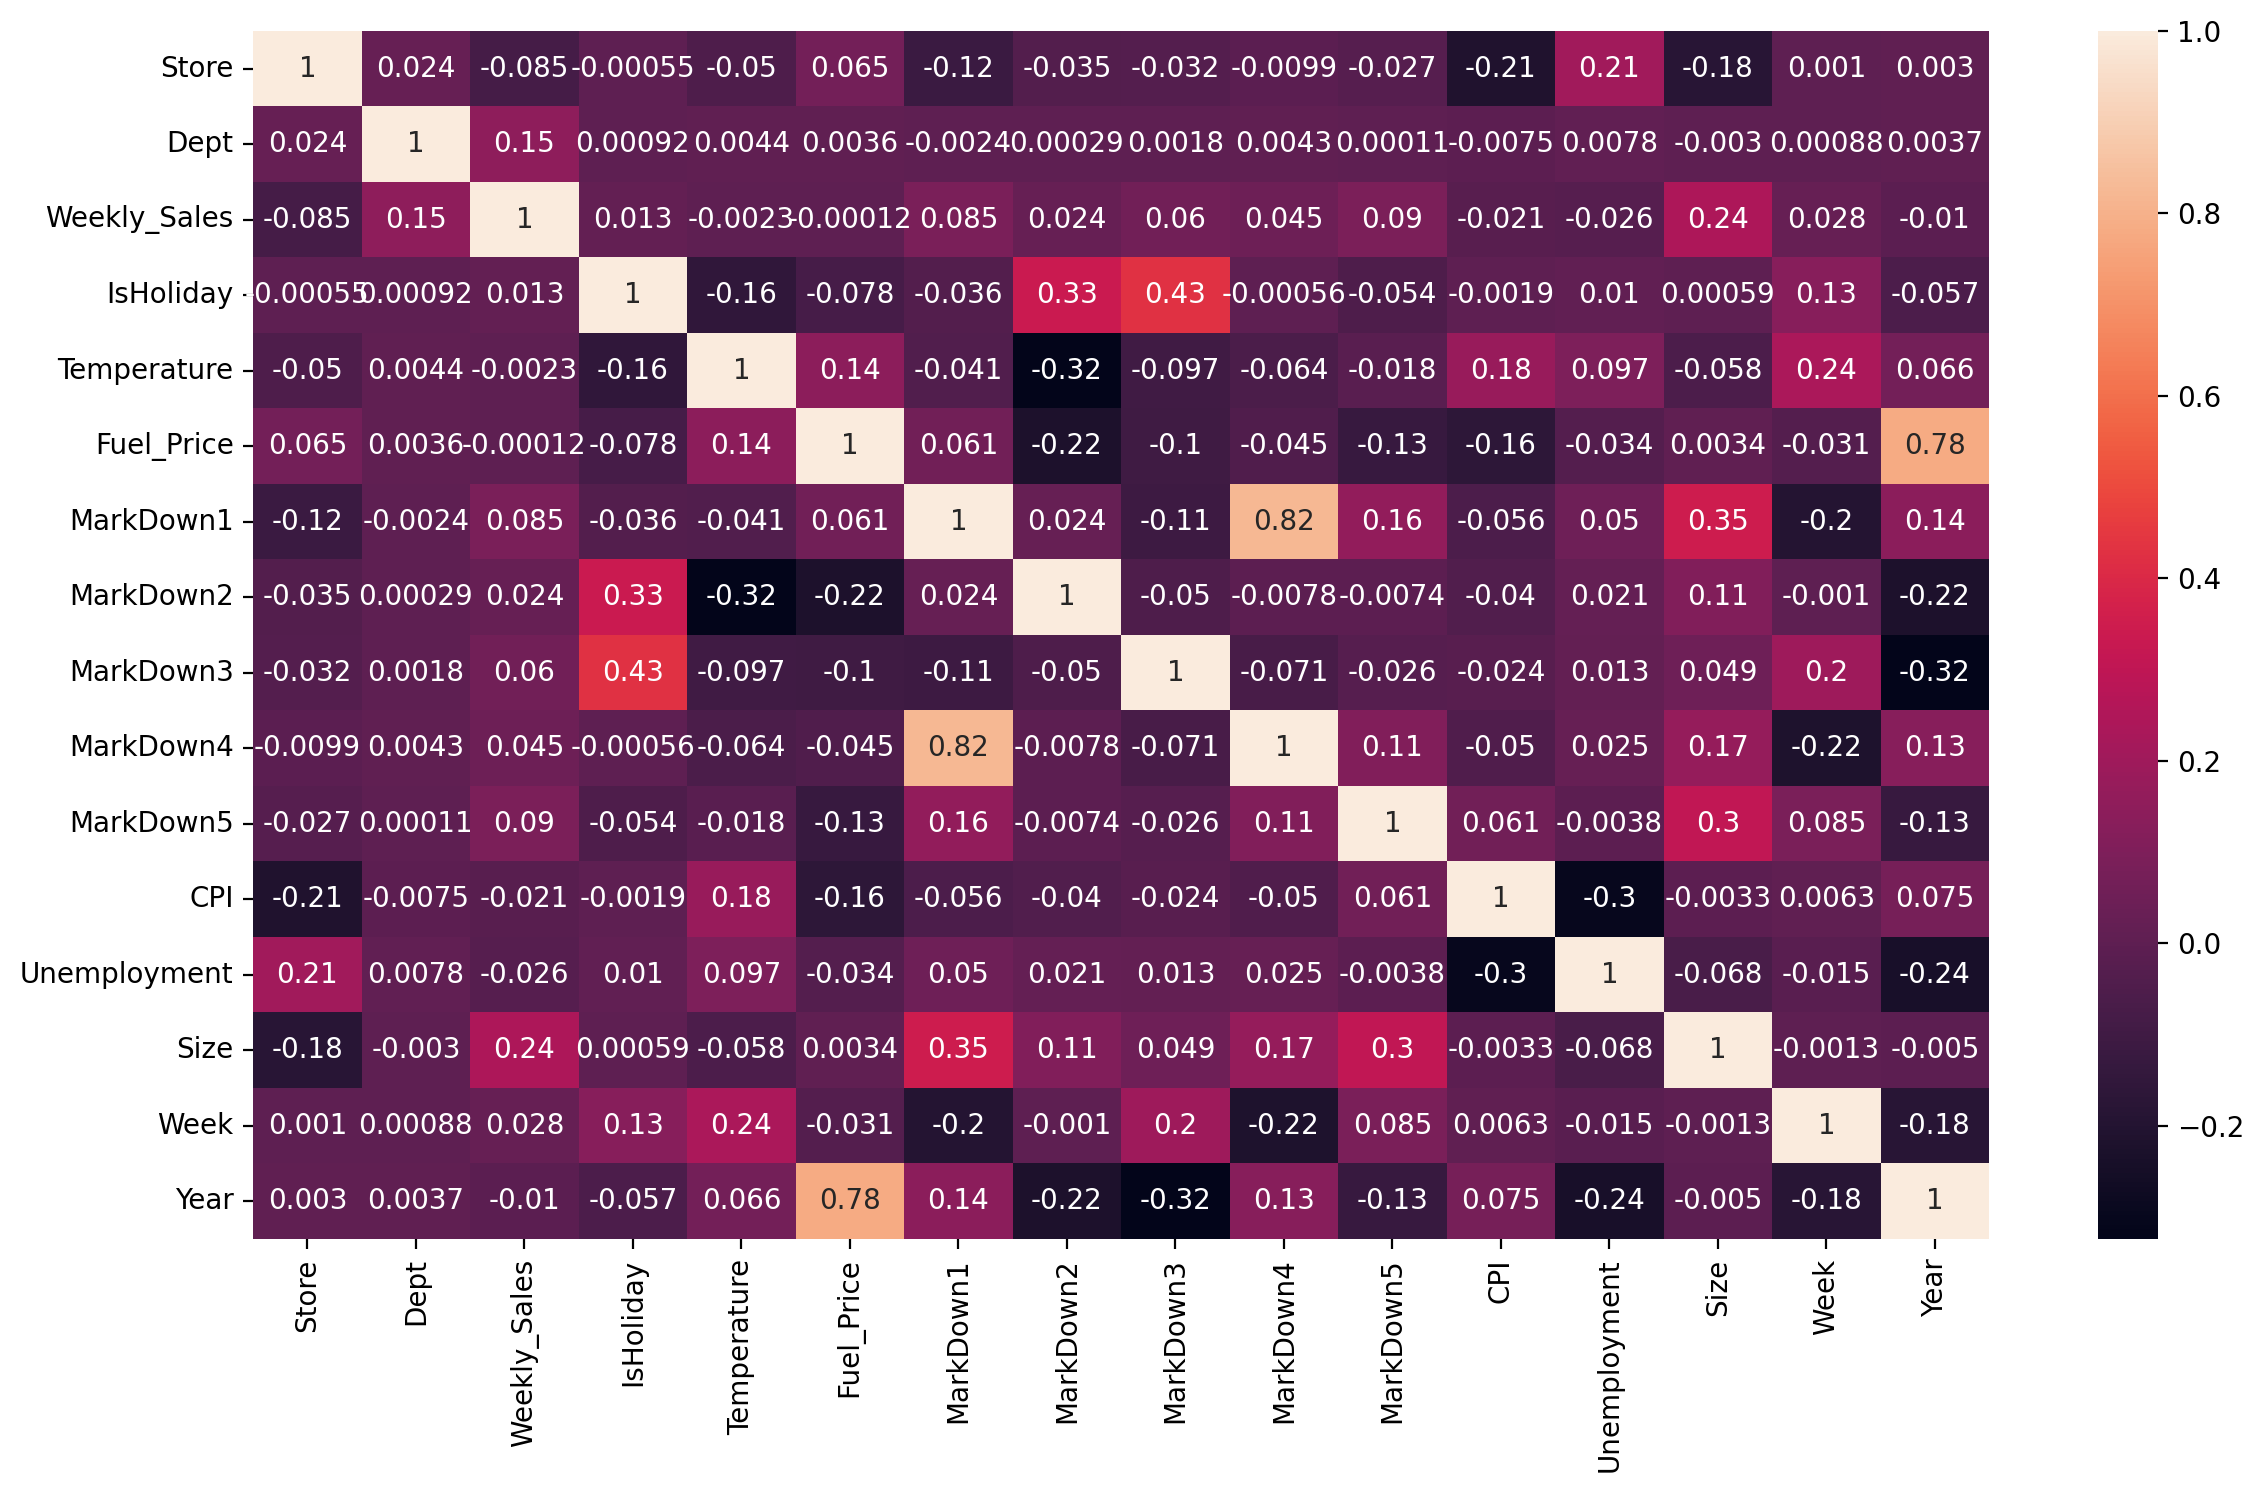

In [621]:
plt.figure(figsize=(14,8),dpi=200)
sns.heatmap(df.corr(),annot=True)

In [622]:
# drop all the MarkDown columns 

In [623]:
df = df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [624]:
# dropping other columns which have less correlation with weekly_sales

In [625]:
df = df.drop(['CPI','Fuel_Price','Unemployment','Temperature','Year'],axis=1)

In [626]:
df.shape

(421570, 7)

In [627]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Week'], dtype='object')

In [628]:
df['Dept'].value_counts()

1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [629]:
df[df['Store']==1]['Weekly_Sales'].sum()

222402808.85000002

In [630]:
storewise_sales = df.groupby('Store').mean()['Weekly_Sales']

In [631]:
storewise_sales.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
           dtype='int64', name='Store')

In [632]:
storewise_sales.values

array([21710.54362066, 26898.07003126,  6373.03398296, 29161.21041472,
        5053.41581287, 21913.24362354,  8358.76614833, 13133.01476806,
        8772.89037893, 26332.30381871, 19276.76275094, 14867.30861927,
       27355.13689135, 28784.85172709,  9002.49307343,  7863.22412369,
       12954.39363646, 15733.31313622, 20362.12673433, 29508.30159193,
       11283.43549572, 15181.21888625, 19776.1808806 , 18969.1064998 ,
       10308.15781008, 14554.12967221, 24826.98453594, 18714.88980322,
        8158.8106092 ,  8764.2377194 , 19681.90746401, 16351.62185454,
        5728.41405272, 13522.08167058, 13803.59698573,  8584.41256348,
       10297.35502637,  7492.47845966, 21000.76356246, 13763.63280323,
       17976.0046481 , 11443.37011793, 13415.11411791,  6038.92981448,
       11662.89731452])

/home/smadhu/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store'>

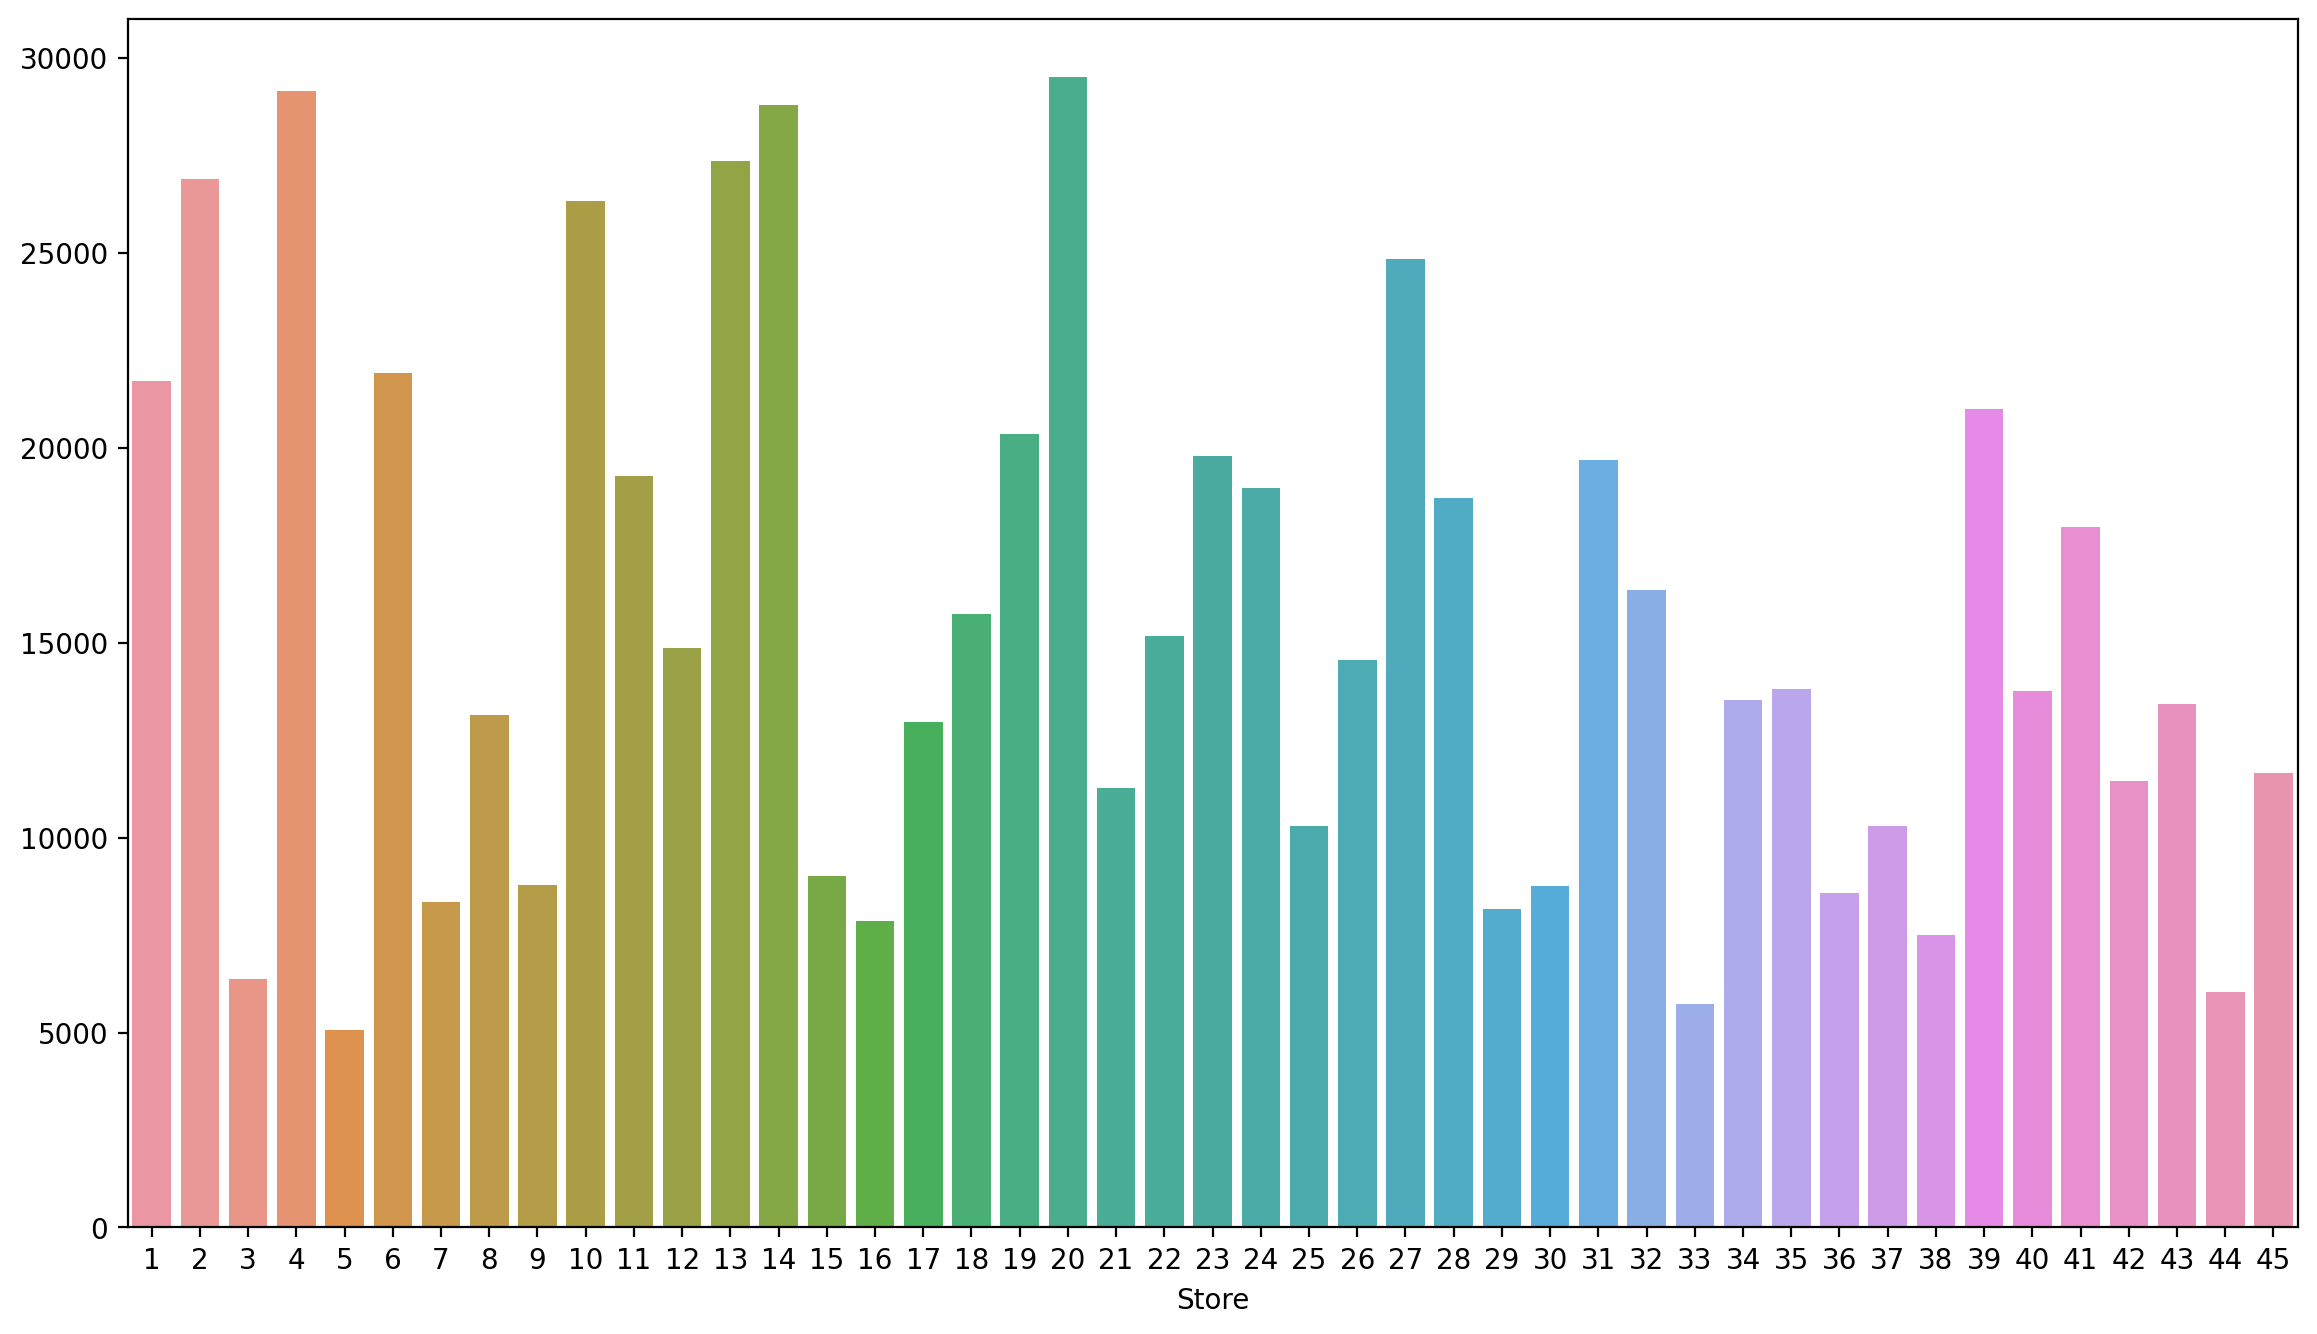

In [633]:
plt.figure(figsize=(14,8),dpi=200)

sns.barplot(storewise_sales.index,storewise_sales.values)

# storewise sales

In [634]:
deptwise_sales = df.groupby('Dept').mean()['Weekly_Sales']

/home/smadhu/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


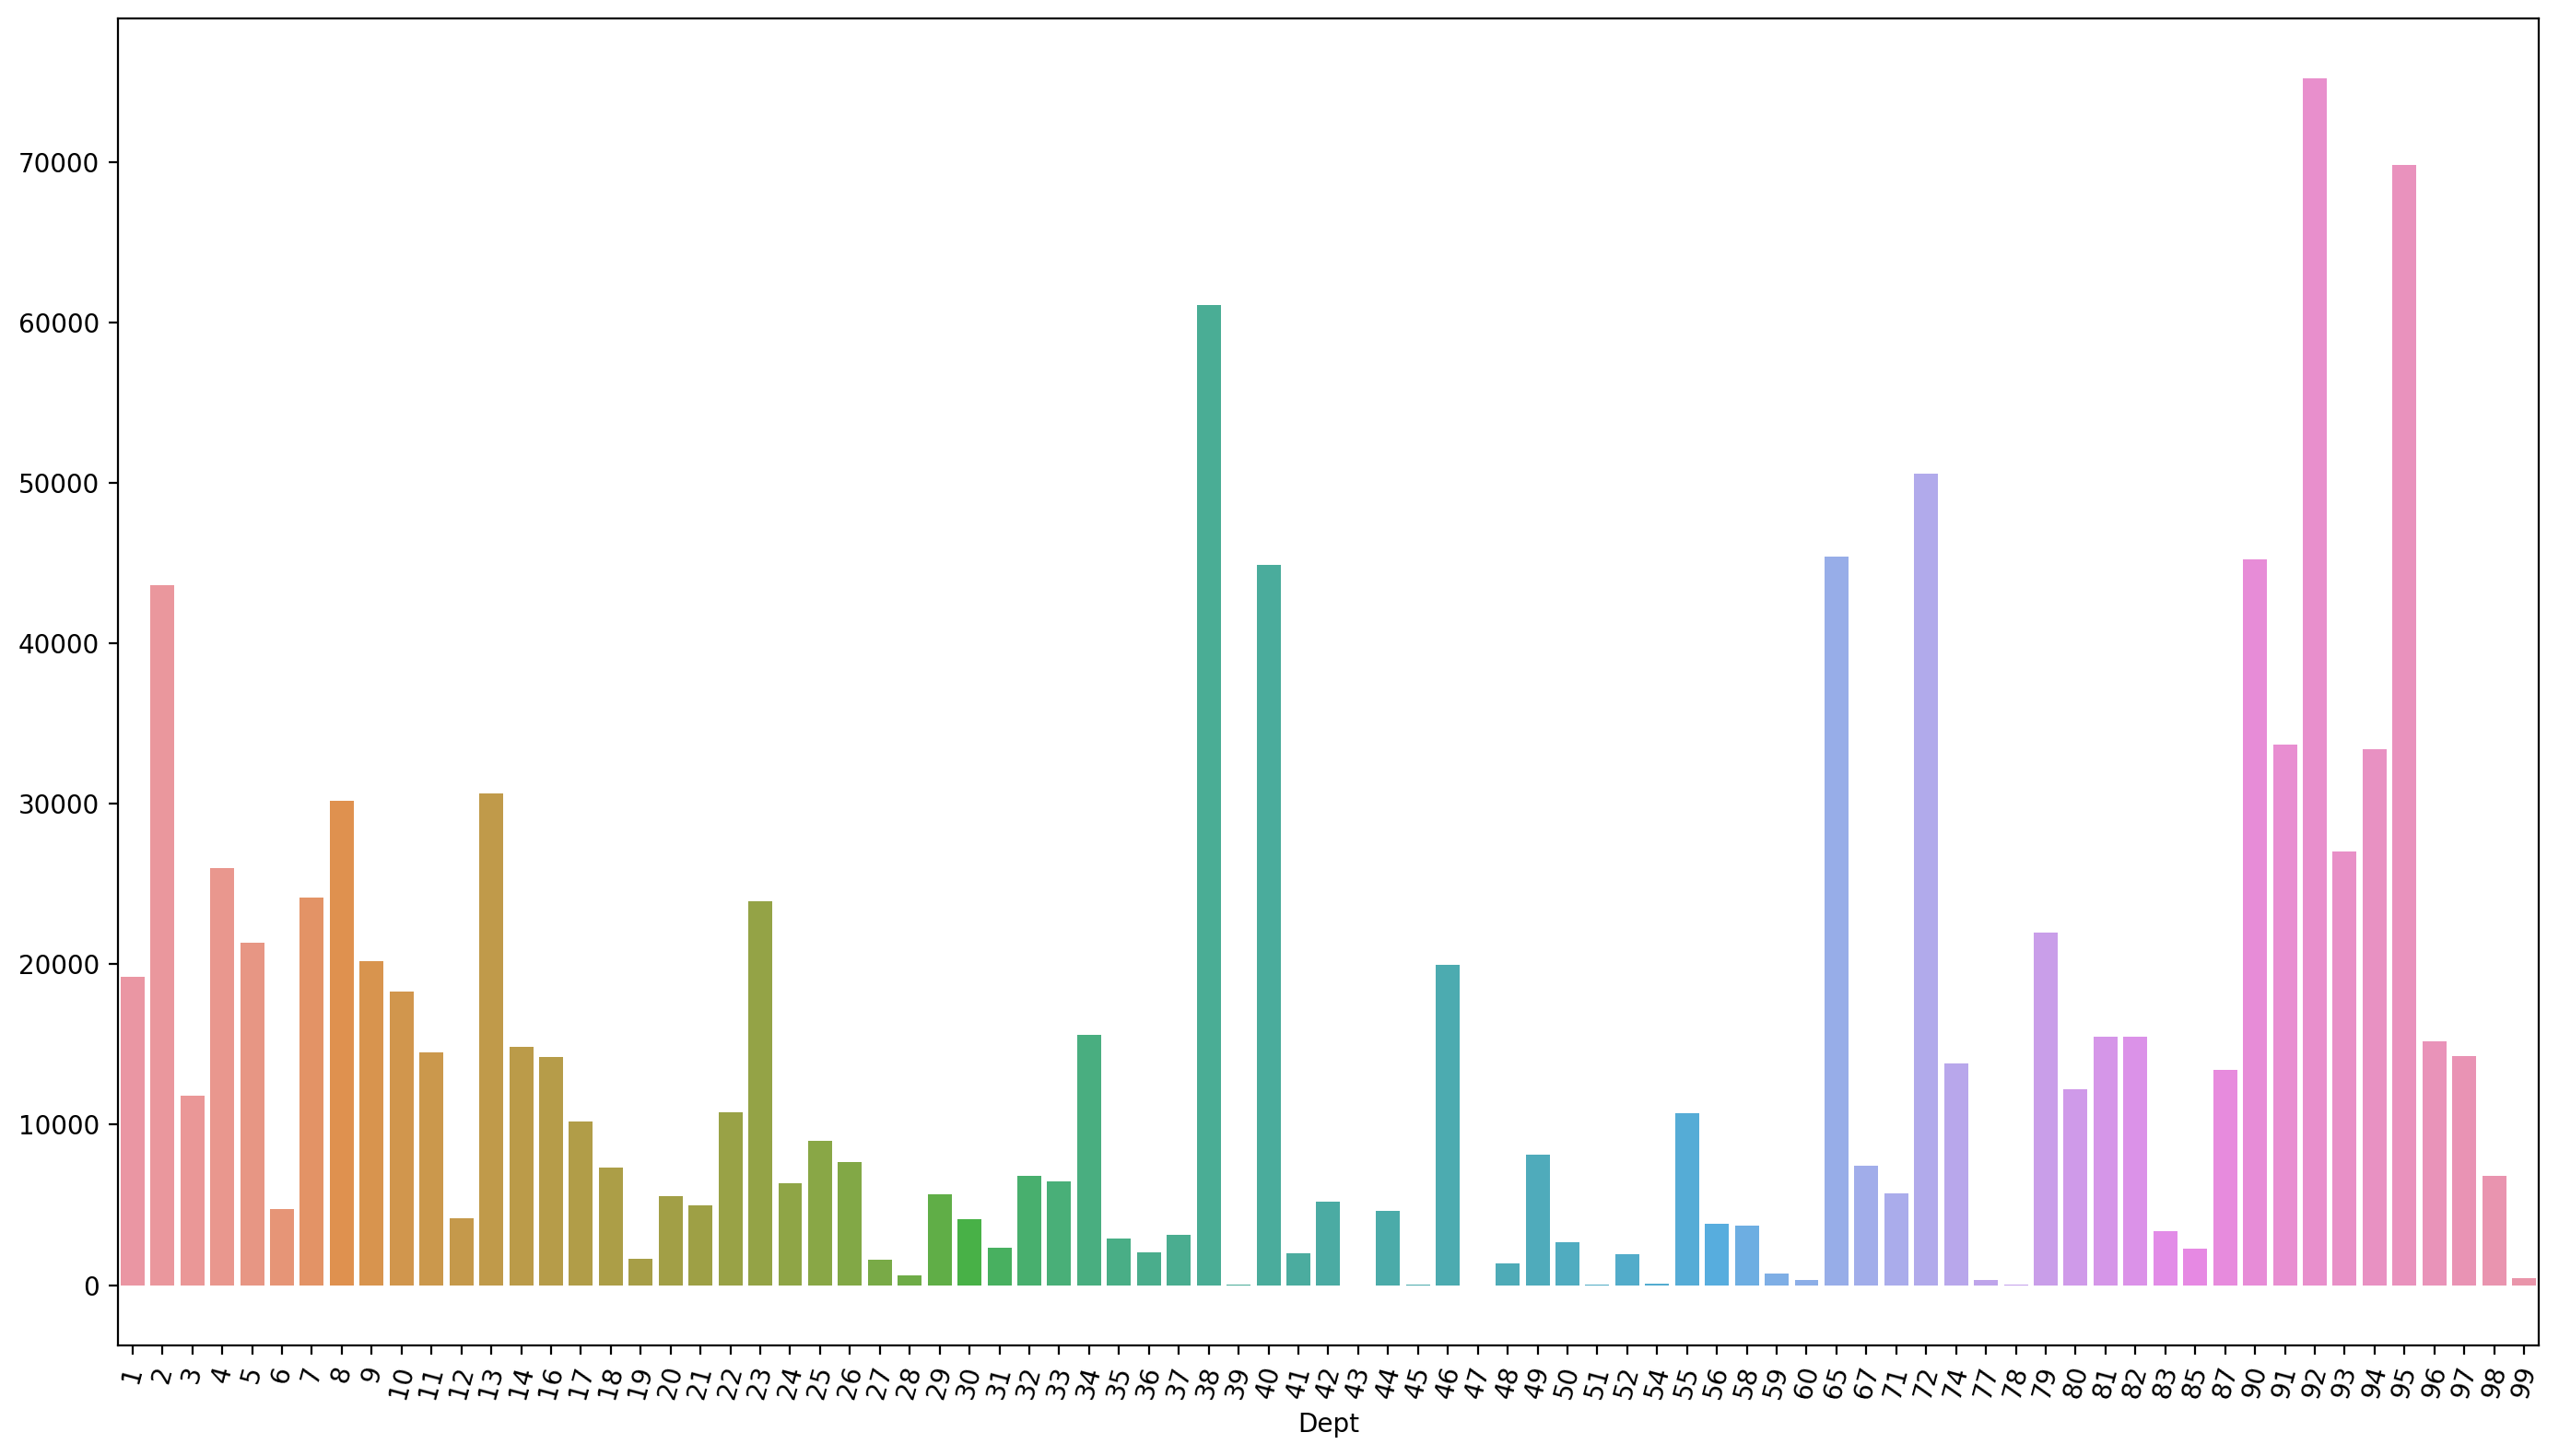

In [635]:
plt.figure(figsize=(14,8),dpi=200)

sns.barplot(deptwise_sales.index,deptwise_sales.values)

plt.xticks(rotation=75)

plt.tight_layout()

In [636]:
# lets see the effect of holidays on weekly sales

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

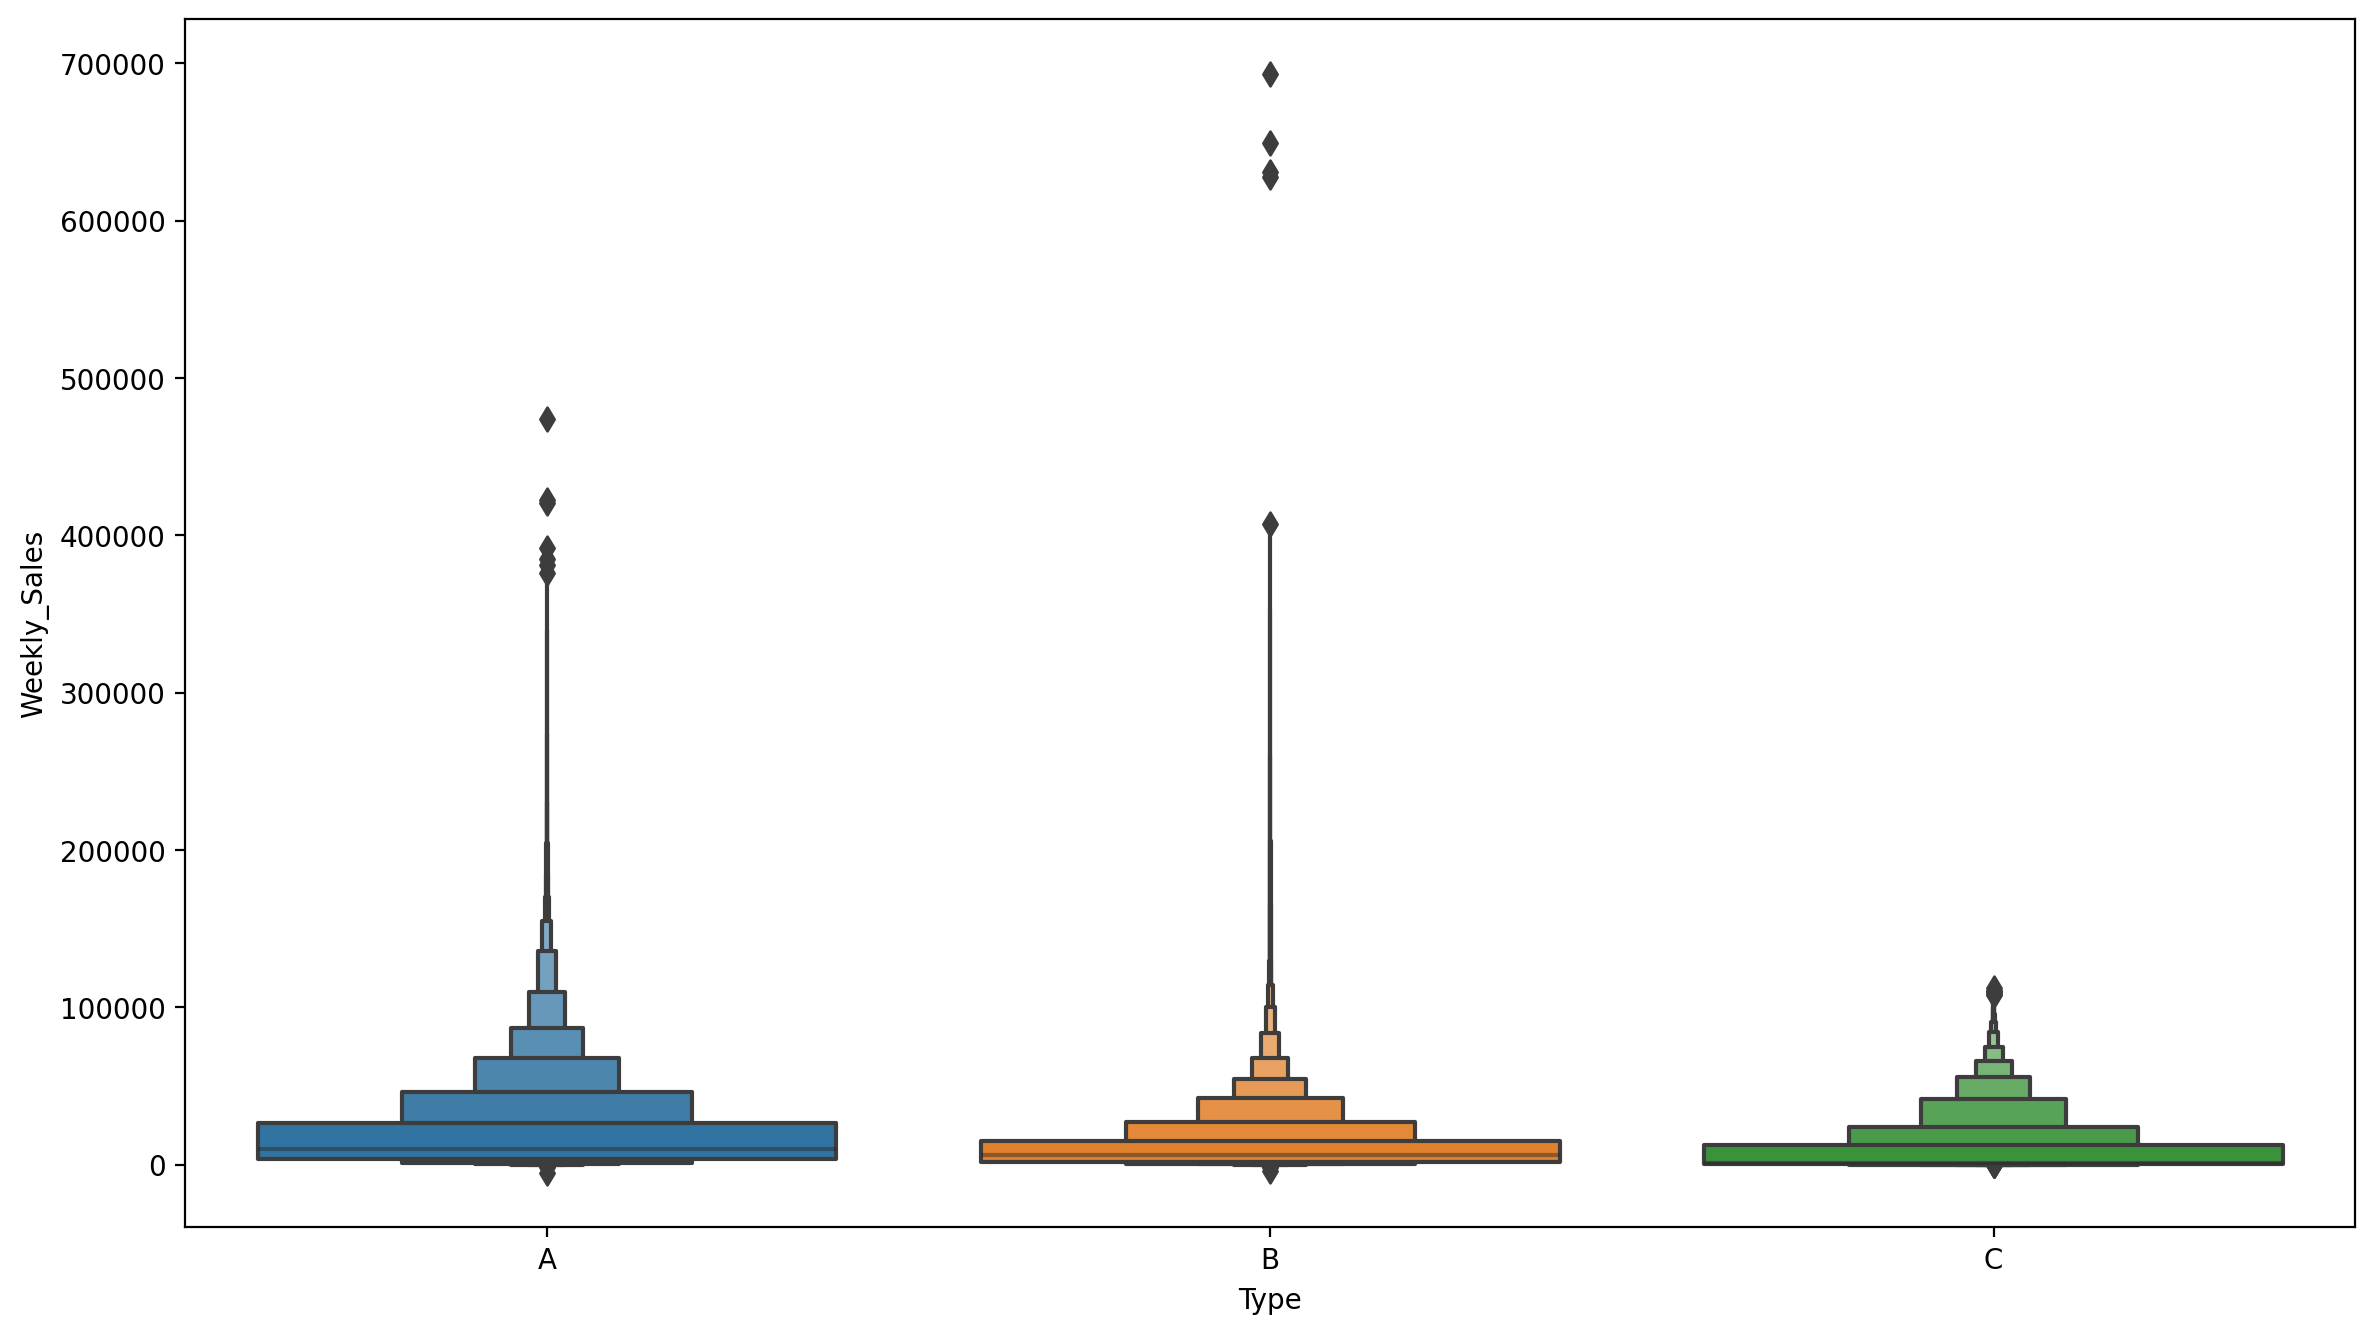

In [637]:
plt.figure(figsize=(14,8),dpi=200)

sns.boxenplot(data=df,y='Weekly_Sales',x='Type')

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

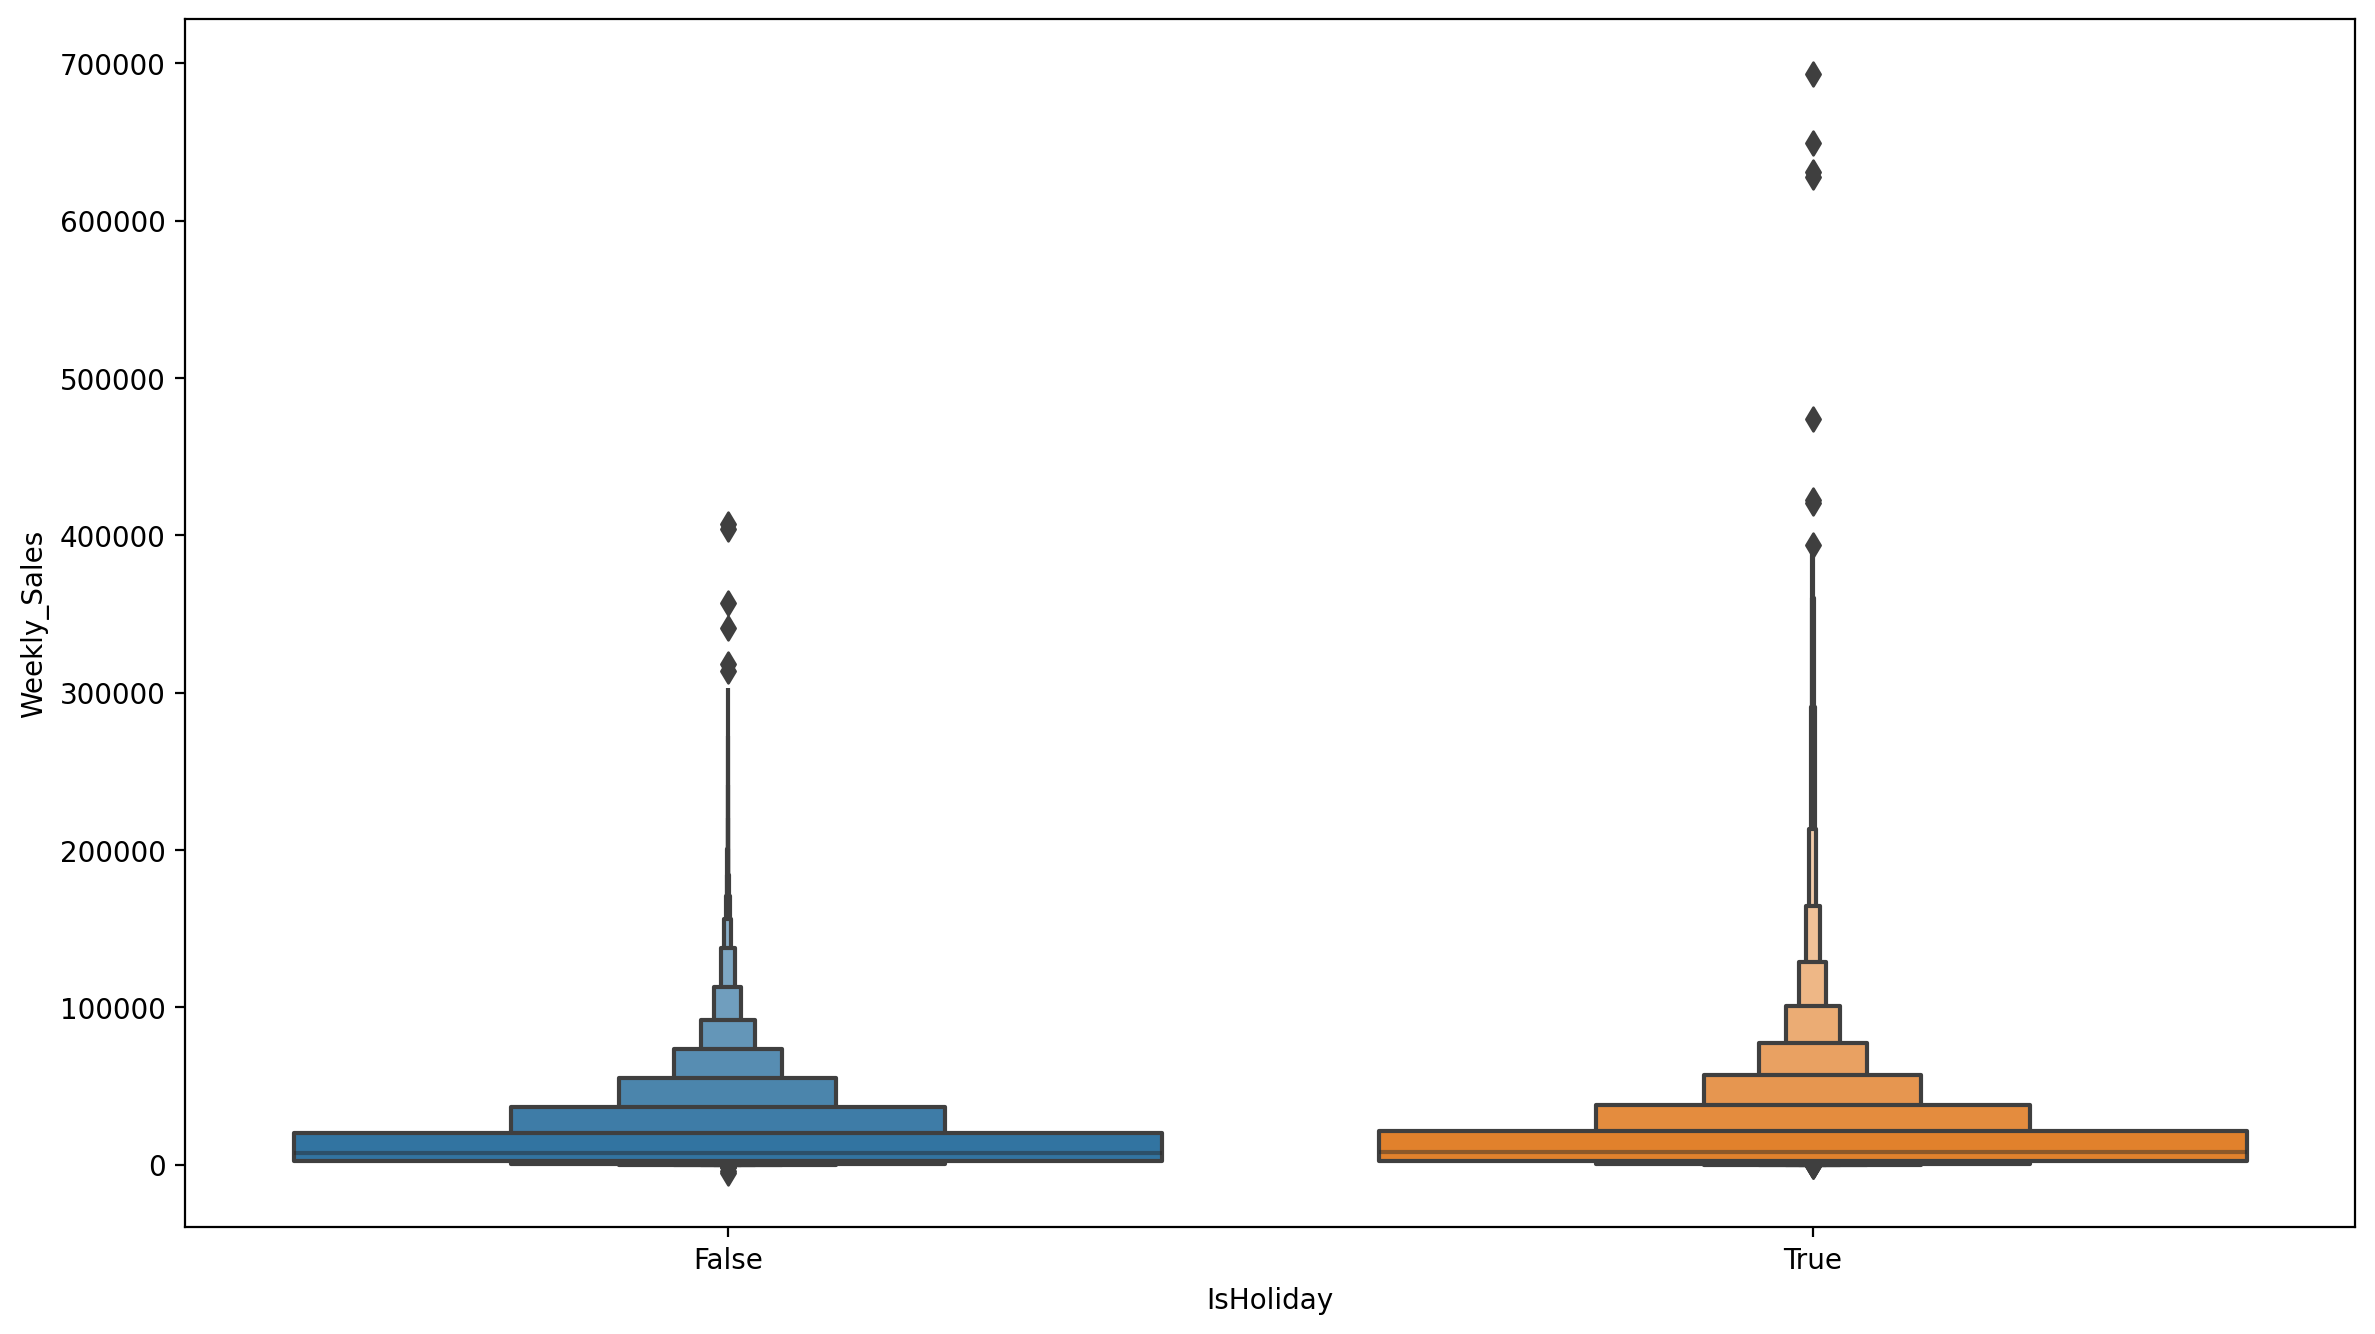

In [638]:
plt.figure(figsize=(14,8),dpi=200)

sns.boxenplot(data=df,y='Weekly_Sales',x='IsHoliday')

In [639]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Week'], dtype='object')

In [640]:
df.shape

(421570, 7)

In [641]:
df = df[df['Weekly_Sales']>0]

# dropped negative sales

In [642]:
df.shape

(420212, 7)

In [643]:
X = df.drop('Weekly_Sales',axis=1)

y = df['Weekly_Sales']

In [644]:
X.shape

(420212, 6)

In [645]:
X.columns

Index(['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'Week'], dtype='object')

In [646]:
def one_shot_encoding(df,column,prefix):
    newcols = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df,newcols],axis=1)
    df = df.drop(column,axis=1)
    return df

In [647]:
X = one_shot_encoding(X,'Store','Store')
X = one_shot_encoding(X,'Dept','Dept')
X = one_shot_encoding(X,'IsHoliday','')
X = one_shot_encoding(X,'Type','Type')
X = one_shot_encoding(X,'Week','Week')

In [648]:
# some method of one-shot encoding
#
#categorical_cols = ['Store','Dept','IsHoliday', 'Type','Week']

#encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X[categorical_cols])
#encoded_cols = list(encoder.get_feature_names(categorical_cols))

# Process the training data
#X[encoded_cols] = encoder.transform(X[categorical_cols])

#X = X.drop(categorical_cols,axis=1)

In [649]:
X.shape

(420212, 184)

In [650]:
week_labels = []
for i in range(1,53):
    week_labels.append('Week_'+str(i))

In [651]:
store_labels = []
for i in range(1,46):
    store_labels.append('Store_'+str(i))

In [652]:
dept_labels = []
for i in range(1,100):
    dept_labels.append('Dept_'+str(i))

In [653]:
for i in range(0,99):
    if dept_labels[i] not in list(X.columns):
        X[dept_labels[i]] = 0

In [654]:
for i in range(0,52):
    if week_labels[i] not in list(X.columns):
        X[week_labels[i]] = 0

In [655]:
for i in range(0,45):
    if store_labels[i] not in list(X.columns):
        X[store_labels[i]] = 0

In [656]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [657]:
# list of categorical columns to be one-shot encoded:

# Store, Dept, IsHoliday, Type, Week

In [658]:
X.shape

(420212, 202)

In [659]:
# SCALING DATA

In [660]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [661]:
# Linear Regression with Ridge Regularization or simply RIDGE REGRESSION 

In [662]:
linear_model_ridge = Ridge()
linear_model_ridge.fit(scaled_X_train,y_train)
y_pred_linear_ridge = linear_model_ridge.predict(scaled_X_test)

In [663]:
# PERFORMANCE OF RIDGE REGRESSION

# R^2 value-coefficient of determination of the prediction.See the definition of R^2 in help of .score()

linear_model_ridge.score(scaled_X_train,y_train), linear_model_ridge.score(scaled_X_test,y_test)

print("Ridge Regression: Training set: R^2 score", linear_model_ridge.score(scaled_X_train,y_train))
print("Ridge Regression: Test set: R^2 score", linear_model_ridge.score(scaled_X_test,y_test))

# the first value here is R^2 value of Training and 2nd one is Testing

Ridge Regression: Training set: R^2 score 0.6636074763575655
Ridge Regression: Test set: R^2 score 0.6633097313669135


In [664]:
# PERFORMANCE OF RIDGE REGRESSION

# "linear_model_ridge.predict(scaled_X_train)" is the prediction of model for the TRAINING data

MAE_linear_ridge_training = mean_absolute_error(y_train,linear_model_ridge.predict(scaled_X_train))
print("Ridge Regression: Training set- MAE = ", MAE_linear_ridge_training)

MAE_linear_ridge_testing = mean_absolute_error(y_test,y_pred_linear_ridge)
print("Ridge Regression: Testing set- MAE = ", MAE_linear_ridge_testing)

RMSE_linear_ridge_training = np.sqrt(mean_squared_error(y_train,linear_model_ridge.predict(scaled_X_train)))
print("Ridge Regression: Training set- RMSE = ",RMSE_linear_ridge_training)

RMSE_linear_ridge_testing = np.sqrt(mean_squared_error(y_test,y_pred_linear_ridge))
print("Ridge Regression: Testing set- RMSE = ",RMSE_linear_ridge_testing)

r2_score_linear_ridge_training = r2_score(y_train,linear_model_ridge.predict(scaled_X_train))
print("Ridge Regression: Training set- R^2 =",r2_score_linear_ridge_training)
                                     
r2_score_linear_ridge_testing = r2_score(y_test,y_pred_linear_ridge)
print("Ridge Regression: Testing set- R^2 =",r2_score_linear_ridge_testing)

Ridge Regression: Training set- MAE =  8114.748216789921
Ridge Regression: Testing set- MAE =  8139.753899593823
Ridge Regression: Training set- RMSE =  13170.905438250418
Ridge Regression: Testing set- RMSE =  13216.790032228659
Ridge Regression: Training set- R^2 = 0.6636074763575655
Ridge Regression: Testing set- R^2 = 0.6633097313669135


In [77]:
# Lets perform Elasticnet (lasso-L1, Ridge-L2 combination) with GridSearchCV

In [79]:
elasticnet_model_basic = ElasticNet()

In [84]:
# this execution is taking a lot of time

param_grid = {'alpha':[0.1,1,5], 'l1_ratio':[0.1,0.5,1]} 

elasticnet_grid_model = GridSearchCV(estimator=elasticnet_model_basic,
                          param_grid=param_grid,scoring='neg_mean_squared_error',
                          cv=5,verbose=1)

In [85]:
# Execution ofthis line is taking time, hence commenting it. best parameters are saved in the following line
# elasticnet_grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.278e+12, tolerance: 1.217e+10
  model = cd_fast.enet_coordinate_descent(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.242e+12, tolerance: 1.211e+10
  model = cd_fast.enet_coordinate_descent(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

In [87]:
elasticnet_grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [89]:
# final model with the optimum parameters given by GridSearchCV

# The optimum parameters suggested by GridSearchCV for ElasticNet are: {'alpha': 1, 'l1_ratio': 1}

elasticnet_grid_model_final = ElasticNet(alpha=1,l1_ratio=1)  # these hyperparameter values are suggested by gridsearchcv
elasticnet_grid_model_final.fit(scaled_X_train,y_train)
y_pred_elastic = elasticnet_grid_model_final.predict(scaled_X_test)

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.102e+12, tolerance: 1.517e+10
  model = cd_fast.enet_coordinate_descent(


In [90]:
# PERFORMANCE OF ElasticNet with Grid Search
print("Elasticnet Regression: Training set: R^2 score", elasticnet_grid_model_final.score(scaled_X_train,y_train))
print("Elasticnet Regression: Testing set: R^2 score", elasticnet_grid_model_final.score(scaled_X_test,y_test))

MAE_elasticnet = mean_absolute_error(y_test,y_pred_elastic)
print("Ridge Regression: Testing set- MAE = ", MAE_elasticnet)

RMSE_elasticnet = np.sqrt(mean_squared_error(y_test,y_pred_elastic))
print("Ridge Regression: Testing set- RMSE = ",RMSE_elasticnet)

r2_score_elasticnet = r2_score(y_test,y_pred_elastic)
print("Ridge Regression: Testing set- R^2 =",r2_score_elasticnet)


Elasticnet Regression: Training set: R^2 score 0.6636071334154878
Elasticnet Regression: Test set: R^2 score 0.6633099824667616
 Ridge Regression:MAE =  8138.09801372169
Ridge Regression:RMSE =  13216.785103760423
 Ridge Regression:R^2 = 0.6633099824667616


In [92]:
# The performance of Elastic Regression with l1_ratio=1 corresponds to Lasso (L1) Regression.
# For this problem Lasso and Ridge gave almost same performance

In [724]:
# Decision Trees

In [725]:
model_dt = DecisionTreeRegressor(random_state=42)   # random state is optional, i just have a value
model_dt.fit(scaled_X_train,y_train)
y_pred_dt = model_dt.predict(scaled_X_test)

In [726]:
# PERFORMANCE OF Decision Tree

MAE_dt_training = mean_absolute_error(y_train,model_dt.predict(scaled_X_train))
print("Decision Tree: Training set- MAE = ", MAE_dt_training)

MAE_dt_testing = mean_absolute_error(y_test,y_pred_dt)
print("Decision Tree: Testing set- MAE = ", MAE_dt_testing)

RMSE_dt_training = np.sqrt(mean_squared_error(y_train,model_dt.predict(scaled_X_train)))
print("Decision Tree: Testing set- RMSE = ",RMSE_dt_training)

RMSE_dt_testing = np.sqrt(mean_squared_error(y_test,y_pred_dt))
print("Decision Tree: Testing set- RMSE = ",RMSE_dt_testing)

r2_score_dt_training = r2_score(y_train,model_dt.predict(scaled_X_train))
print("Decision Tree: Testing set- R^2 =",r2_score_dt_training)

r2_score_dt_testing = r2_score(y_test,y_pred_dt)
print("Decision Tree: Testing set- R^2 =",r2_score_dt_testing)


Decision Tree: Training set- MAE =  960.4872638717018
Decision Tree: Testing set- MAE =  2007.9806499873077
Decision Tree: Testing set- RMSE =  2184.1758810285496
Decision Tree: Testing set- RMSE =  4506.6470199914065
Decision Tree: Testing set- R^2 = 0.9907489658170143
Decision Tree: Testing set- R^2 = 0.9608541551941339


In [108]:
# Random Forest- default parameter values

In [109]:
model_rf = RandomForestRegressor(n_jobs=-1,random_state=42)
model_rf.fit(scaled_X_train,y_train)
y_pred_rf = model_rf.predict(scaled_X_test)

In [118]:
# PERFORMANCE OF Random Forest

MAE_rf_training = mean_absolute_error(y_train,model_rf.predict(scaled_X_train))
print("Random Forest: Training set- MAE = ", MAE_rf_training)

MAE_rf_testing = mean_absolute_error(y_test,y_pred_rf)
print("Random Forest: Testing set- MAE = ", MAE_rf_testing)

RMSE_rf_training = np.sqrt(mean_squared_error(y_train,model_rf.predict(scaled_X_train)))
print("Random Forest: Training set- RMSE = ",RMSE_rf_training)

RMSE_rf_testing = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("Random Forest: Testing set- RMSE = ",RMSE_rf_testing)

r2_score_rf_training = r2_score(y_train,model_rf.predict(scaled_X_train))
print("Random Forest: Training set- R^2 =",r2_score_rf_training)

r2_score_rf_testing = r2_score(y_test,y_pred_rf)
print("Random Forest: Testing set- R^2 =",r2_score_rf_testing)


Random Forest: Training set- MAE =  1096.420363802439
Random Forest: Testing set- MAE =  1854.1489648830104
Random Forest: Training set- RMSE =  2406.2296676423284
Random Forest: Testing set- RMSE =  4184.158405198654
Random Forest: Training set- R^2 = 0.9887723406943163
Random Forest: Testing set- R^2 = 0.9662561354987873


In [732]:
# XGBoost (default values)

In [117]:
XGBmodel = XGBRegressor(n_jobs=-1, random_state=42)
XGBmodel.fit(scaled_X_train,y_train)
y_pred_xgboost = XGBmodel.predict(scaled_X_test)

In [119]:
# PERFORMANCE OF XGBoost

MAE_xgb_training = mean_absolute_error(y_train,XGBmodel.predict(scaled_X_train))
print("XGBoost: Training set- MAE = ", MAE_xgb_training)

MAE_xgb_testing = mean_absolute_error(y_test,y_pred_xgboost)
print("XGBoost: Testing set- MAE = ", MAE_xgb_testing)

RMSE_xgb_training = np.sqrt(mean_squared_error(y_train,XGBmodel.predict(scaled_X_train)))
print("XGBoost: Training set- RMSE = ",RMSE_xgb_training)

RMSE_xgb_testing = np.sqrt(mean_squared_error(y_test,y_pred_xgboost))
print("XGBoost: Testing set- RMSE = ",RMSE_xgb_testing)

r2_score_xgb_training = r2_score(y_train,XGBmodel.predict(scaled_X_train))
print("XGBoost: Training set- R^2 =",r2_score_xgb_training)

r2_score_xgb_testing = r2_score(y_test,y_pred_xgboost)
print("XGBoost: Testing set- R^2 =",r2_score_xgb_testing)

XGBoost: Training set- MAE =  3416.401626100209
XGBoost: Testing set- MAE =  3463.067712591549
XGBoost: Training set- RMSE =  5752.038005817784
XGBoost: Testing set- RMSE =  5926.010171379641
XGBoost: Training set- R^2 = 0.935840855349657
XGBoost: Testing set- R^2 = 0.9323132957987637


In [120]:
# random forest given best performance

In [733]:
# XGBoost with different hyperparameters

In [694]:
XGB_tuned = XGBRegressor(learning_rate = 0.3, n_estimators=600, 
                        n_jobs=-1, random_state=42, max_depth=11,
                         booster='gbtree')

XGB_tuned.fit(scaled_X_train,y_train)
y_pred_xgboost_2 = XGB_tuned.predict(scaled_X_test)

In [695]:
# PERFORMANCE OF XGBoost-different hyperparameters

MAE_xgb_2_training = mean_absolute_error(y_train,XGB_tuned.predict(scaled_X_train))
print("XGBoost: Training set- MAE = ", MAE_xgb_2_training)

MAE_xgb_2_testing = mean_absolute_error(y_test,y_pred_xgboost_2)
print("XGBoost: Testing set- MAE = ", MAE_xgb_2_testing)

RMSE_xgb_2_training = np.sqrt(mean_squared_error(y_train,XGB_tuned.predict(scaled_X_train)))
print("XGBoost: Training set- RMSE = ",RMSE_xgb_2_training)

RMSE_xgb_2_testing = np.sqrt(mean_squared_error(y_test,y_pred_xgboost_2))
print("XGBoost: Testing set- RMSE = ",RMSE_xgb_2_testing)

r2_score_xgb_2_training = r2_score(y_train,XGB_tuned.predict(scaled_X_train))
print("XGBoost: Training set- R^2 =",r2_score_xgb_2_training)

r2_score_xgb_2_testing = r2_score(y_test,y_pred_xgboost_2)
print("XGBoost: Testing set- R^2 =",r2_score_xgb_2_testing)

XGBoost: Training set- MAE =  1256.8524227421192
XGBoost: Testing set- MAE =  1764.4761573970675
XGBoost: Training set- RMSE =  2397.104213057892
XGBoost: Testing set- RMSE =  3895.207799584403
XGBoost: Training set- R^2 = 0.9888573394083489
XGBoost: Testing set- R^2 = 0.9707557932823572


In [124]:
# XGBoost with these hyperparameters has given best performance

In [702]:
# Test the performance on Testing data of the kaggle testing data set now

In [703]:
testdf = pd.read_csv('test.csv')

In [704]:
testdf.shape

(115064, 4)

In [705]:
df_test = pd.merge(testdf,df_features,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True).merge(df_stores,how='inner',on='Store')


In [706]:
df_test['Date'] = pd.to_datetime(df_test['Date'])

df_test['Week'] = df_test['Date'].dt.isocalendar().week
df_test['Year'] = df_test['Date'].dt.isocalendar().year

In [707]:
df_test.shape

(115064, 17)

In [708]:
# drop all the MarkDown columns and other columns

In [709]:
df_test = df_test.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Fuel_Price','Unemployment','Temperature','Year'],axis=1)

In [710]:
df_test.shape

(115064, 7)

In [711]:
df_test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Week'], dtype='object')

In [712]:
# Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Week'], dtype='object')

In [713]:
df_test = df_test.set_index('Date')

In [714]:
df_test.head()

,Store,Dept,IsHoliday,Type,Size,Week
Date,,,,,,
2012-11-02,1,1,False,A,151315,44
2012-11-09,1,1,False,A,151315,45
2012-11-16,1,1,False,A,151315,46
2012-11-23,1,1,True,A,151315,47
2012-11-30,1,1,False,A,151315,48


In [715]:
df_test = one_shot_encoding(df_test,'Store','Store')
df_test = one_shot_encoding(df_test,'Dept','Dept')
df_test = one_shot_encoding(df_test,'IsHoliday','')
df_test = one_shot_encoding(df_test,'Week','Week')
df_test = one_shot_encoding(df_test,'Type','Type')

In [716]:
df_test.shape

(115064, 171)

In [680]:
# categorical_cols = ['Store','Dept','IsHoliday', 'Type','Week']

#encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df_test[categorical_cols])
#encoded_cols = list(encoder.get_feature_names(categorical_cols))

# Process the training data
#df_test[encoded_cols] = encoder.transform(df_test[categorical_cols])

# df_test = df_test.drop(categorical_cols,axis=1)

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_8427/2546447861.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[encoded_cols] = encoder.transform(df_test[categorical_cols])
/tmp/ipykernel_8427/2546447861.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t

/tmp/ipykernel_8427/2546447861.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[encoded_cols] = encoder.transform(df_test[categorical_cols])
/tmp/ipykernel_8427/2546447861.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[encoded_cols] = encoder.transform(df_test[categorical_cols])
/tmp/ipykernel_8427/2546447861.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

/tmp/ipykernel_8427/2546447861.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[encoded_cols] = encoder.transform(df_test[categorical_cols])
/tmp/ipykernel_8427/2546447861.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[encoded_cols] = encoder.transform(df_test[categorical_cols])
/tmp/ipykernel_8427/2546447861.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

In [717]:
for i in range(0,99):
    if dept_labels[i] not in list(df_test.columns):
        df_test[dept_labels[i]] = 0

In [718]:
for i in range(0,52):
    if week_labels[i] not in list(df_test.columns):
        df_test[week_labels[i]] = 0

In [719]:
for i in range(0,45):
    if store_labels[i] not in list(df_test.columns):
        df_test[store_labels[i]] = 0

In [720]:
df_test.shape

(115064, 202)

In [721]:
# IMPORTANT:

# WE HAVE TRAINED OUT MODEL ON SCALED DATA, HENCE SCALE FINAL TEST DATA ALSO

df_test = scaler.transform(df_test)

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [722]:
df_test.shape

(115064, 202)

In [727]:
final_test_data_pred = model_dt.predict(df_test)

In [728]:
final_test_data_pred

array([1.9485225e+04, 1.9485225e+04, 1.9485225e+04, ..., 2.2000000e+01,
       8.2500000e+00, 6.5965000e+02])

In [729]:
submission_df = pd.read_csv('sampleSubmission.csv')

In [730]:
submission_df['Weekly_Sales'] = final_test_data_pred


In [731]:
submission_df.to_csv('wallmart2.csv', index=False)